# Tidyverse
![tidyverse](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/tidyverse-default.png)

#### what is tidyverse?
Tidyverse is a collection of essential R packages for data science. The packages under the tidyverse umbrella help us in performing and interacting with the data. There are a whole host of things you can do with your data, such as `subsetting`,` transforming`, `visualizing`, etc.

#### Core R Packages in Tidyverse 

   - Data Wrangling and Transformation
    
    dplyr
    
    tidyr 
    
    stringr
    
    forcats
   - Data Import and Management
     
    tibble
    
    readr 
   - Functional Programming
     
    purrr
   - Data Visualization and Exploration
     
    ggplot2

The following figure illustrates a canonical data science workflow, and shows how the individual packages fit in.
![](https://rviews.rstudio.com/post/2017-06-09-What-is-the-tidyverse_files/tidyverse1.png)

## 调用Gapminder数据集

Loading the gapminder and dplyr packages
```r
install.packages("gapminder")
```
```r
library(gapminder) # 一个数据集
library(tidyverse) # 调用包
str(gapminder) # 查看数据集组成
```

## chapter01 _dplyr包
```r
library(dplyr)
```
### %>% 管道与 三种verb

#### 管道%>%

`%>%`是一个重要的管道工具，可以将**左边**的东西赋予给右边；

#### 三种verb （操作）

- 筛选`filter()` for particular observations
- 排序`arrange()` the observations in a desired order
- 变形`mutate()` to add or change a column

In [1]:
# Filter, mutate, and arrange the gapminder dataset
gapminder %>%
  filter(year == 2007) %>%
    mutate(lifeExpMonths = 12*lifeExp) %>%
      arrange(desc(lifeExpMonths)) #降序排列

ERROR: Error in gapminder %>% filter(year == 2007) %>% mutate(lifeExpMonths = 12 * : 没有"%>%"这个函数


## chapter02_ggplot2
#### 关于 ggplot2 的 aes
`aes`里除了 `x`,`y`轴，还有`color` 和`size`都包括在内。这样子就可以**同时**放 4 个变量在图上。

Warning message:
"package 'gapminder' was built under R version 3.6.2"Warning message:
"package 'dplyr' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.6.2"

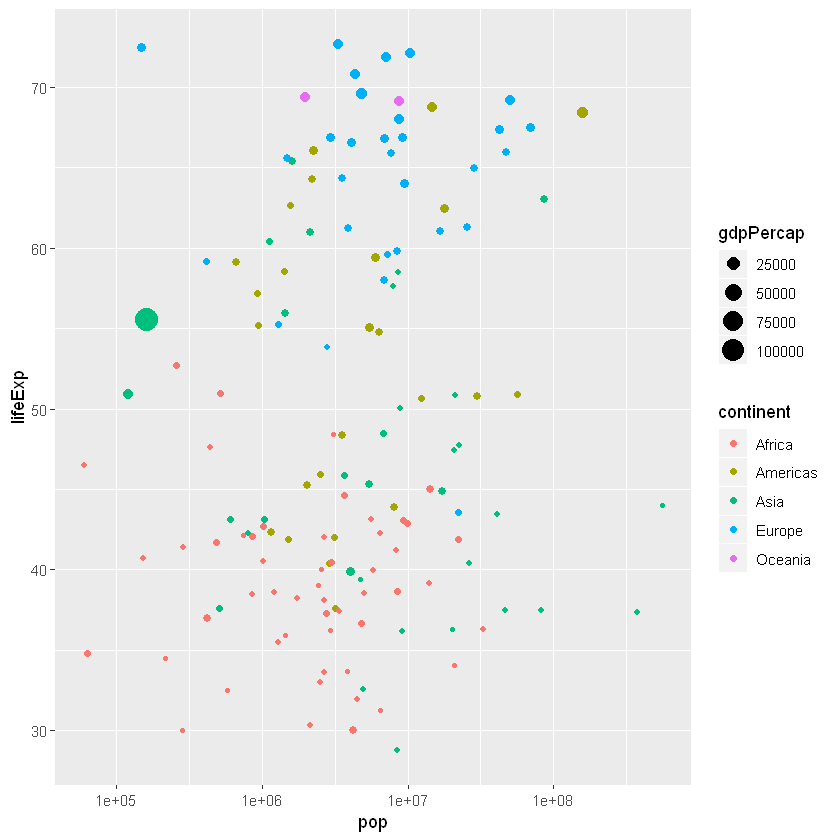

In [2]:
library(gapminder)
library(dplyr)
library(ggplot2)

gapminder_1952 <- gapminder %>%  # %>% 是pipe ，将左边的值赋予右边
  filter(year == 1952)

# Add the size aesthetic to represent a country's gdpPercap
ggplot(gapminder_1952, aes(x = pop, y = lifeExp, color = continent,
                            size = gdpPercap)) +
  geom_point() +
  scale_x_log10() # x轴取 log

# 四个变量同时在一张图上

#### facet 用分面来表示另一个变量

如果觉得信息量太大，你还可以使用分面(`facet`)功能来表示一些比较小的变量.

使用语法：
```r
在原有图层基础上 + 
facet_wrap(~ 变量)
```

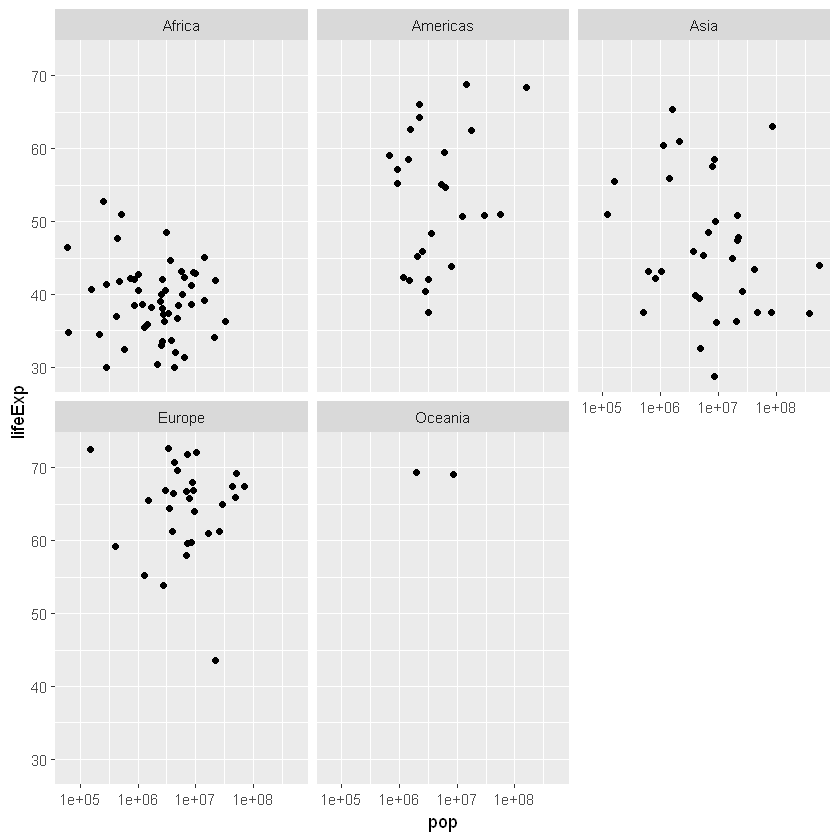

In [3]:
# Scatter plot comparing pop and lifeExp, faceted by continent
# 通过
ggplot(gapminder_1952, aes(x = pop, y = lifeExp))+
geom_point()+
scale_x_log10()+
facet_wrap(~ continent)

现在将**更多**的变量呈现在图上：

- 主图里呈现 4 个变量
- 分面以年份分割

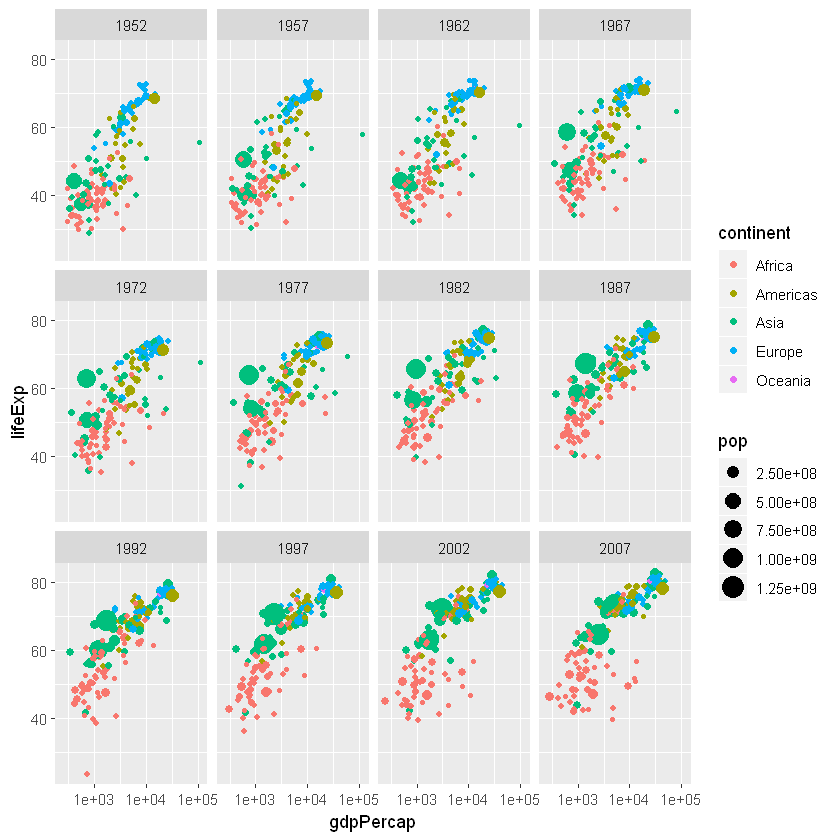

In [4]:
# Scatter plot comparing gdpPercap and lifeExp, with color representing continent
# and size representing population, faceted by year
ggplot(gapminder, aes(x = gdpPercap, 
                      y = lifeExp, 
                      color = continent, 
                      size = pop))+
geom_point()+
scale_x_log10()+
facet_wrap(~ year)

# 你能看到亚洲的发展

## chapter03_ Grouping and summarizing

`summarise()`函数可以对数据进行**统计描述**。

### 动词 ：summarize( )

In [5]:
library(gapminder)
library(dplyr)

# 统计1957年全球寿命的中位数
# Filter for 1957 then summarize the median life expectancy
gapminder %>% 
  filter(year == 1957) %>%
    summarize(medianLifeExp = median(lifeExp))

medianLifeExp
48.3605


In [6]:
# 再加一个人均GDP最大值
# Filter for 1957 then summarize the median life expectancy and the maximum GDP per capita
gapminder %>%
  filter(year == 1957)%>%
    summarize(medianLifeExp = median(lifeExp), # 中位数
    maxGdpPercap = max(gdpPercap)) # 最大值

medianLifeExp,maxGdpPercap
48.3605,113523.1


### 动词：group_by()

通过配合group_by和summarize ，得到**分组清晰**的结果

》计算所有年份的**总数**：

In [7]:
library(gapminder)
library(dplyr)  

# Find median life expectancy and maximum GDP per capita in each year
gapminder%>%
  summarize(medianLifeExp = median(lifeExp),maxGdpPercap = max(gdpPercap))

medianLifeExp,maxGdpPercap
60.7125,113523.1


》可以看到上述结果只有 total 的一行

》按年份**分组**计算：

In [8]:
library(gapminder)
library(dplyr)  

# Find median life expectancy and maximum GDP per capita in each year
gapminder%>%
  group_by(year)%>%
    summarize(medianLifeExp = median(lifeExp),maxGdpPercap = max(gdpPercap))

year,medianLifeExp,maxGdpPercap
1952,45.1355,108382.35
1957,48.3605,113523.13
1962,50.8810,95458.11
1967,53.8250,80894.88
1972,56.5300,109347.87
1977,59.6720,59265.48
1982,62.4415,33693.18
1987,65.8340,31540.97
1992,67.7030,34932.92
1997,69.3940,41283.16


》 将**1957年**的数据按**各大洲**来分组

In [14]:
# Find median life expectancy and maximum GDP per capita in each continent in 1957
library("tidyverse")
library("gapminder")
library("dplyr") 

gapminder %>%
  filter(year == 1957) %>%
    group_by(continent) %>%
      # Find median life expectancy and maximum GDP per capita in each continent in 1957
gapminder %>%
  filter(year == 1957) %>%
    group_by(continent) %>%
      summarize(medianLifeExp = median(lifeExp),maxGdpPercap = max(gdpPercap))

ERROR: Error in gapminder(.): 没有"gapminder"这个函数


》 **同时**按年份和各大洲分类：
```r
group_by(year,continent)
```

In [15]:
# Find median life expectancy and maximum GDP per capita in each continent/year combination
gapminder %>%
 group_by(year,continent)%>% 
  summarize(medianLifeExp = median(lifeExp),maxGdpPercap = max(gdpPercap))

year,continent,medianLifeExp,maxGdpPercap
1952,Africa,38.8330,4725.296
1952,Americas,54.7450,13990.482
1952,Asia,44.8690,108382.353
1952,Europe,65.9000,14734.233
1952,Oceania,69.2550,10556.576
1957,Africa,40.5925,5487.104
1957,Americas,56.0740,14847.127
1957,Asia,48.2840,113523.133
1957,Europe,67.6500,17909.490
1957,Oceania,70.2950,12247.395


》 查看**中国**每年的情况：

In [ ]:
gapminder %>%
  filter(country == "China") %>% #先把中国筛选出来
    group_by(year) %>%  # 按年份分组
      summarize(medianLifeExp = median(lifeExp),maxGdpPercap = max(gdpPercap))

### 将结果可视化

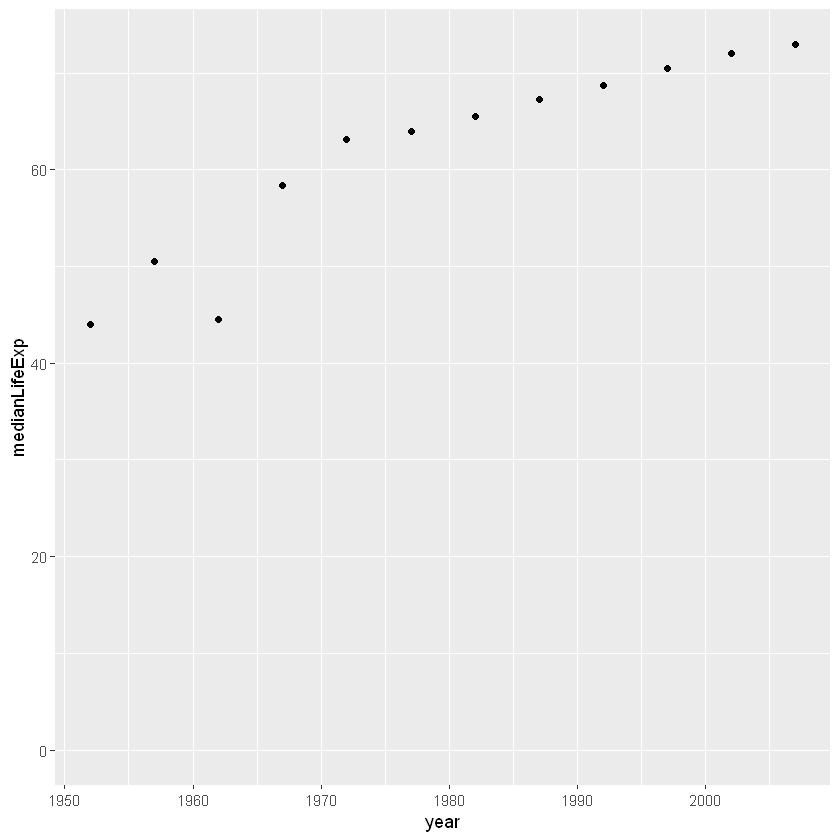

In [16]:
# 结合ggplot2
by_year_china<- 
    gapminder %>%
  filter(country == "China") %>% #先把中国筛选出来
    group_by(year) %>%  # 按年份分组
      summarize(medianLifeExp = median(lifeExp),maxGdpPercap = max(gdpPercap))

ggplot(by_year_china,aes(x= year, y = medianLifeExp))+
geom_point()+
expand_limits(y=0) # 记得要使得 y 轴从 0 开始


### geom_line 折线图


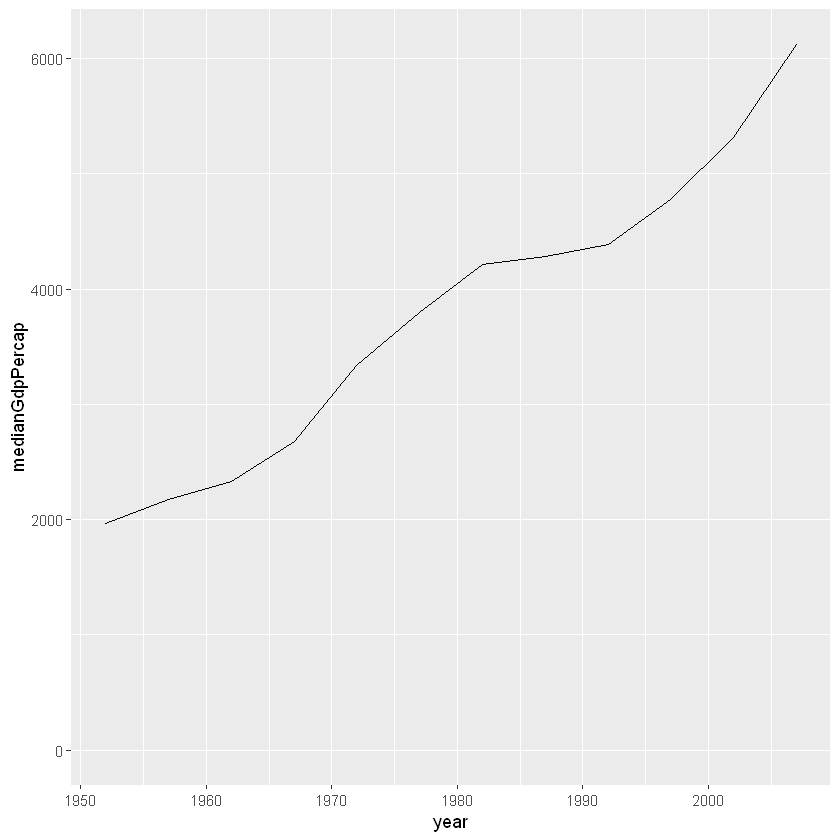

In [17]:
library(dplyr)
library(ggplot2)

# Summarize the median gdpPercap by year, then save it as by_year
by_year<-
  gapminder %>%
  group_by(year) %>%
  summarize(medianGdpPercap= median(gdpPercap))

# Create a line plot showing the change in medianGdpPercap over time
ggplot(by_year, aes(x= year,y = medianGdpPercap))+
geom_line()+
expand_limits(y = 0)

还可以**同时**加点线：

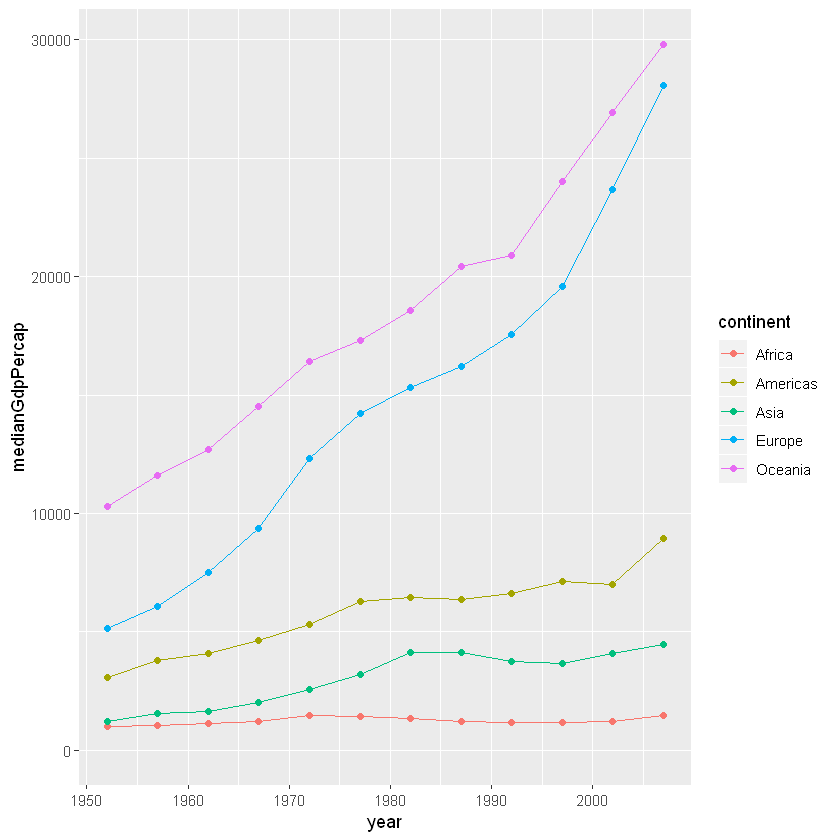

In [18]:
library(ggplot2)

# Summarize the median gdpPercap by year & continent, save as by_year_continent
by_year_continent<-
  gapminder%>%
  group_by(year,continent)%>%
  summarize(medianGdpPercap= median(gdpPercap))

# Create a line plot showing the change in medianGdpPercap by continent over time
ggplot(by_year_continent, aes(x= year,y = medianGdpPercap,color = continent))+
geom_line()+ # 加线条图层
geom_point()+ #加散点图层
expand_limits(y = 0)


### 柱状图 geom_col() 

barplots always start **at ZERO**

因此不需要用 `expand_limits(y=0)`

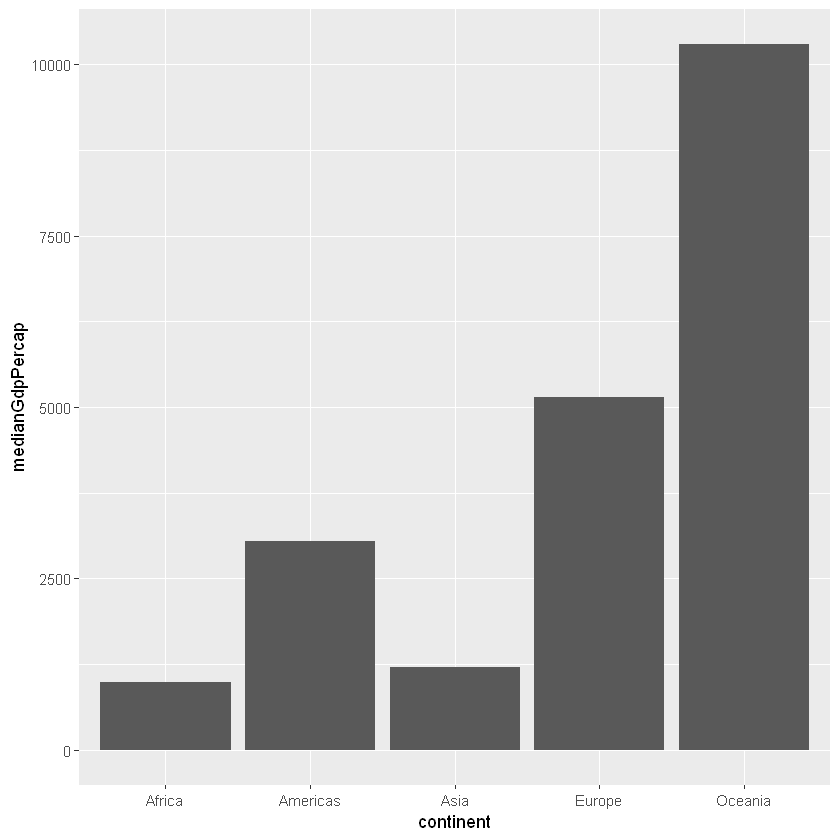

In [19]:
# Summarize ,the median gdpPercap by continent in 1952
by_continent<- 
  gapminder %>%
  filter(year == 1952)%>%
  group_by(continent)%>%
  summarize(medianGdpPercap= median(gdpPercap))

# Create a bar plot showing medianGdp by continent
ggplot(by_continent, aes(x = continent,y = medianGdpPercap))+
geom_col()

### 直方图 geom_histogram()

**！注意**

直方图和柱状图是不一样的。

直方图描述的是对应x轴条目的数量，是对**数量**的描述。而且x轴一般是**连续的变量**


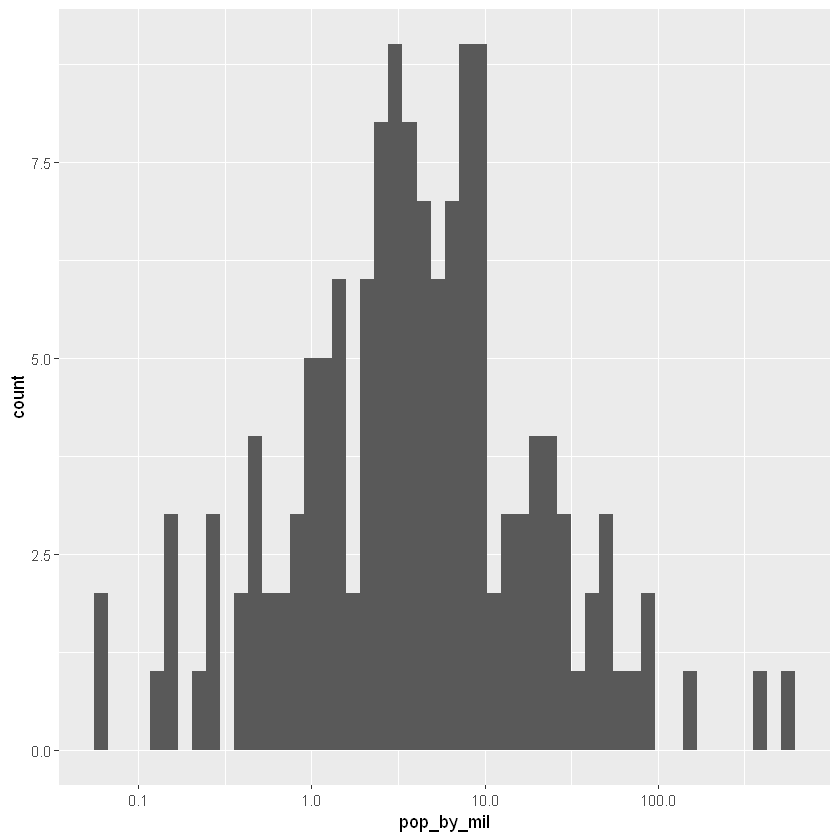

In [22]:
library(dplyr)
library(ggplot2)

gapminder_1952 <- gapminder %>%
  filter(year == 1952) %>%
  mutate(pop_by_mil = pop / 1000000)

# Create a histogram of population (pop_by_mil)
ggplot(gapminder_1952,aes(x = pop_by_mil))+
geom_histogram(bins = 50)+ # 设置每个网格的长度
scale_x_log10()

### 箱型图 geom_boxplot

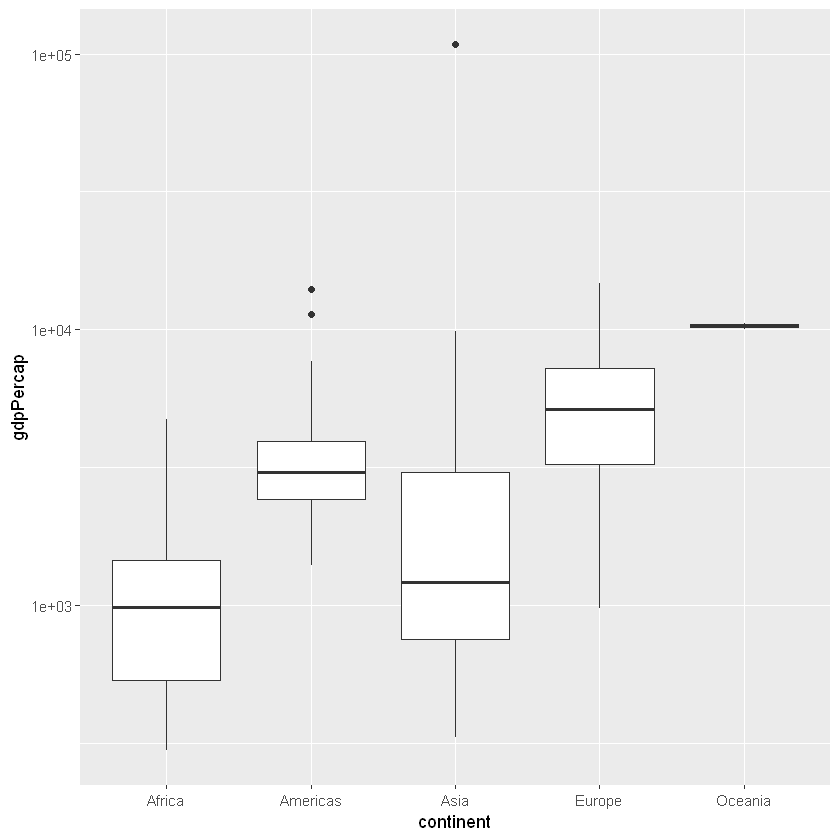

In [23]:
library(gapminder)
library(dplyr)
library(ggplot2)

gapminder_1952 <- gapminder %>%
  filter(year == 1952)

# Create a boxplot comparing gdpPercap among continents
ggplot(gapminder_1952,aes(x = continent,y = gdpPercap))+
geom_boxplot()+
scale_y_log10()

In [24]:
?geom_boxplot()